In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib inline
import sklearn.decomposition as skde

# UnBinned DataSet

In [2]:
df = pd.read_csv('matches.csv')
#NOTE: if you dont drop these two attributes below the pca will only show these two as the most important attributes
df.drop('Team1', axis=1, inplace=True)
df.drop('Team2', axis=1, inplace=True)
print(' done')

 done


In [3]:
print(df.shape)
df.head()

(88552, 29)


,Team1Score,Team1FGM,Team1FGA,Team1FGM3,Team1FGA3,Team1FTM,Team1FTA,Team1OR,Team1DR,Team1Ast,...,Team2FTM,Team2FTA,Team2OR,Team2DR,Team2Ast,Team2TO,Team2Stl,Team2Blk,Team2PF,Win
0,70.857116,24.835506,56.434951,6.414692,18.565785,14.771413,20.665618,10.963364,23.680458,13.852952,...,15.710680,24.005781,11.705997,24.357526,12.123150,15.493189,6.690597,3.153172,18.467932,1.0
1,69.855278,24.480532,53.811272,5.963383,16.755914,14.930832,21.279172,10.879975,24.989000,13.345747,...,16.325509,22.252281,11.423081,25.023546,14.801796,12.812651,6.345888,3.615896,16.994665,0.0
2,74.907473,26.294729,58.543421,6.600664,19.351685,15.717352,23.277168,12.826705,24.878856,14.888045,...,14.981736,21.478844,10.385801,23.829096,14.160912,13.034717,6.020814,3.427225,18.325749,0.0
3,73.853850,25.786073,55.304019,8.163962,21.624711,14.117741,19.608092,9.641230,24.717309,15.223978,...,14.649615,20.785129,11.083005,21.987842,11.666412,14.050869,6.743972,2.753055,20.340310,0.0
4,70.866565,25.397341,56.385076,5.714419,16.266095,14.357464,20.499749,10.694625,24.359701,13.741672,...,14.982759,21.068132,11.159053,24.149595,14.311193,12.886297,6.121473,4.054906,17.563236,1.0


In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df2 = pd.DataFrame(df.select_dtypes(include=numerics))

df2 = df2.dropna() 
print(df2.shape)
df2.head()

(87504, 29)


,Team1Score,Team1FGM,Team1FGA,Team1FGM3,Team1FGA3,Team1FTM,Team1FTA,Team1OR,Team1DR,Team1Ast,...,Team2FTM,Team2FTA,Team2OR,Team2DR,Team2Ast,Team2TO,Team2Stl,Team2Blk,Team2PF,Win
0,70.857116,24.835506,56.434951,6.414692,18.565785,14.771413,20.665618,10.963364,23.680458,13.852952,...,15.710680,24.005781,11.705997,24.357526,12.123150,15.493189,6.690597,3.153172,18.467932,1.0
1,69.855278,24.480532,53.811272,5.963383,16.755914,14.930832,21.279172,10.879975,24.989000,13.345747,...,16.325509,22.252281,11.423081,25.023546,14.801796,12.812651,6.345888,3.615896,16.994665,0.0
2,74.907473,26.294729,58.543421,6.600664,19.351685,15.717352,23.277168,12.826705,24.878856,14.888045,...,14.981736,21.478844,10.385801,23.829096,14.160912,13.034717,6.020814,3.427225,18.325749,0.0
3,73.853850,25.786073,55.304019,8.163962,21.624711,14.117741,19.608092,9.641230,24.717309,15.223978,...,14.649615,20.785129,11.083005,21.987842,11.666412,14.050869,6.743972,2.753055,20.340310,0.0
4,70.866565,25.397341,56.385076,5.714419,16.266095,14.357464,20.499749,10.694625,24.359701,13.741672,...,14.982759,21.068132,11.159053,24.149595,14.311193,12.886297,6.121473,4.054906,17.563236,1.0


In [5]:
pca_mod = skde.PCA()
pca_comps = pca_mod.fit(df2)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[3.57012251e-01 2.34054357e-01 8.52473384e-02 6.53244460e-02
 6.18635185e-02 4.37025343e-02 3.26342435e-02 2.38431906e-02
 1.54431275e-02 1.19302451e-02 9.90215886e-03 8.96650023e-03
 8.71205861e-03 6.10374362e-03 5.84150860e-03 5.00200922e-03
 4.48357738e-03 4.36009593e-03 3.35110759e-03 3.22185156e-03
 2.93367320e-03 2.21886945e-03 1.99188386e-03 7.99093583e-04
 6.94292614e-04 1.83539742e-04 1.78783878e-04 5.58096103e-31
 4.92590695e-31]
0.9999999999999999


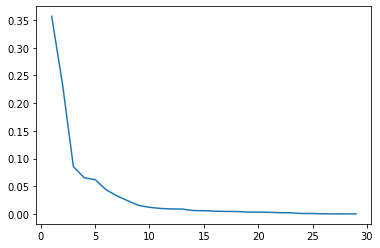

In [7]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)

plot_explained(pca_comps)

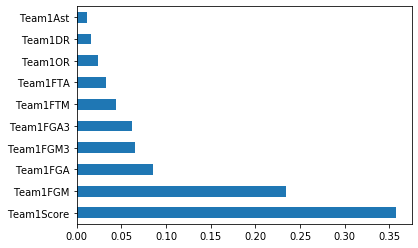

In [8]:
(pd.Series(pca_comps.explained_variance_ratio_, index=df2.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [9]:
#'Team1Score', 'Team1FGM', 'Team1FGA', 'Team1FGM3', 'Team1FGA3', 'Team1FTM', 'Team1FTA', 'Team1OR', 'Team1DR', 'Team1AST'

# Binned Features

In [10]:
df = pd.read_csv('ncaa_matches_binned.csv')
df.drop(df.columns[0], axis=1, inplace=True)
#NOTE: if you dont drop these two attributes below the pca will only show these two as the most important attributes
df.drop('Team1', axis=1, inplace=True)
df.drop('Team2', axis=1, inplace=True)
print(' done')

 done


In [11]:
print(df.shape)
df.head()

(87504, 29)


,Team1Score,Team1FGM,Team1FGA,Team1FGM3,Team1FGA3,Team1FTM,Team1FTA,Team1OR,Team1DR,Team1Ast,...,Team2FTM,Team2FTA,Team2OR,Team2DR,Team2Ast,Team2TO,Team2Stl,Team2Blk,Team2PF,Win
0,2,2,2,0,1,2,1,1,2,3,...,3,3,3,3,1,0,2,2,1,1.0
1,1,1,1,0,0,2,2,1,3,2,...,3,3,3,3,3,3,1,3,0,0.0
2,3,3,3,1,1,3,3,3,3,3,...,2,2,0,2,3,2,1,2,1,0.0
3,3,3,2,3,2,2,0,0,3,3,...,2,1,2,0,0,0,2,0,3,0.0
4,2,2,2,0,0,2,1,1,3,3,...,2,2,2,3,3,3,1,3,0,1.0


In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df2 = pd.DataFrame(df.select_dtypes(include=numerics))

df2 = df2.dropna() 
print(df2.shape)
df2.head()

(87504, 29)


,Team1Score,Team1FGM,Team1FGA,Team1FGM3,Team1FGA3,Team1FTM,Team1FTA,Team1OR,Team1DR,Team1Ast,...,Team2FTM,Team2FTA,Team2OR,Team2DR,Team2Ast,Team2TO,Team2Stl,Team2Blk,Team2PF,Win
0,2,2,2,0,1,2,1,1,2,3,...,3,3,3,3,1,0,2,2,1,1.0
1,1,1,1,0,0,2,2,1,3,2,...,3,3,3,3,3,3,1,3,0,0.0
2,3,3,3,1,1,3,3,3,3,3,...,2,2,0,2,3,2,1,2,1,0.0
3,3,3,2,3,2,2,0,0,3,3,...,2,1,2,0,0,0,2,0,3,0.0
4,2,2,2,0,0,2,1,1,3,3,...,2,2,2,3,3,3,1,3,0,1.0


In [13]:
pca_mod = skde.PCA()
pca_comps = pca_mod.fit(df2)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[0.19168362 0.12656954 0.12325191 0.07632137 0.06552361 0.05724952
 0.05067413 0.03890607 0.02954443 0.02754262 0.02496989 0.02286268
 0.02038317 0.01891199 0.01719543 0.01425382 0.01419576 0.01274312
 0.0112019  0.01082253 0.00731992 0.00723632 0.00632103 0.00547586
 0.0054285  0.00346458 0.00340188 0.00334424 0.00320056]
1.0


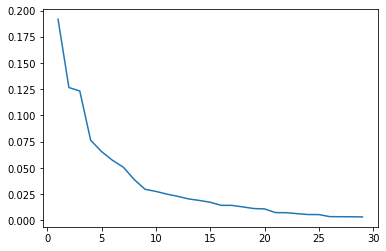

In [15]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)

plot_explained(pca_comps)

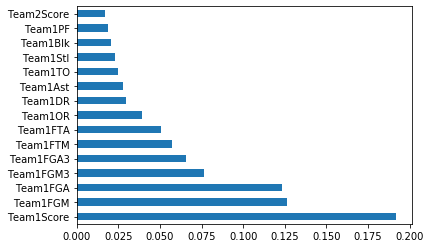

In [17]:
(pd.Series(pca_comps.explained_variance_ratio_, index=df2.columns)
   .nlargest(15)
   .plot(kind='barh')) 